## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import *

In [2]:
%cd ..

/mnt/d/anomaly-detection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


In [4]:
from src.features.build_features import rolling_window
window_length = 64
prediction_len = 2

X = rolling_window(data, window_length, 0)[:-prediction_len]
y = rolling_window(data, window_length, prediction_len)

## Train model

In [5]:
from src.models.lstm import build_model
import keras

build_params = dict(
    input_length=window_length,
    input_shape=data.shape[1],
    lstm_layers_size=[32, 32],
    dropout_coeff=0.1,
    optimizer=keras.optimizers.Adam(lr=0.01),
    reg_strength=0.005,
)

fit_params = dict(
    batch_size=64,
    epochs=20,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau(patience=5),
               keras.callbacks.EarlyStopping(min_delta=0.01, patience=10)]
)

Using TensorFlow backend.
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/t

In [6]:
from src.utils import cross_validate

results = cross_validate(lambda: build_model(**build_params), 3, fit_params, X, y)

Fold 0...
Train on 3183 samples, validate on 3183 samples
Epoch 1/20
3183/3183 [==============================] - 6s 2ms/step - loss: 0.5869 - val_loss: 0.5487
Epoch 2/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.4129 - val_loss: 0.5103
Epoch 3/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3816 - val_loss: 0.4952
Epoch 4/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3687 - val_loss: 0.4908
Epoch 5/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3570 - val_loss: 0.4925
Epoch 6/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3528 - val_loss: 0.4875
Epoch 7/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3429 - val_loss: 0.4837
Epoch 8/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3335 - val_loss: 0.4866
Epoch 9/20
3183/3183 [==============================] - 5s 2ms/step - loss: 0.3267 - val_loss: 0.4869
Epoch 10/20
3183/3183 [=

In [1]:
from src.visualization.visualize import visualize_cv_result

visualize_cv_result(results, f'Window length = {window_length}')

ModuleNotFoundError: No module named 'src'

In [6]:
model = build_model(**build_params)
model.fit(X, y, **fit_params)

Epoch 1/20
12735/12735 [==============================] - 18s 1ms/step - loss: 0.4605
Epoch 2/20
  128/12735 [..............................] - ETA: 17s - loss: 0.3873

/home/elch10/miniconda3/lib/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/elch10/miniconda3/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


12735/12735 [==============================] - 17s 1ms/step - loss: 0.3543
Epoch 3/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.3224
Epoch 4/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.3027
Epoch 5/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2915
Epoch 6/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2798
Epoch 7/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2738
Epoch 8/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2696
Epoch 9/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2644
Epoch 10/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2628
Epoch 11/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2593
Epoch 12/20
12735/12735 [==============================] - 17s 1ms/step - loss: 0.2605
Epoch 13/20
12735/12735 [==============================] - 17s

In [7]:
model.save('models/lstm.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64, 32)            9472      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64, 32)            8320      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 64, 41)            1353      
Total params: 19,145
Trainable params: 19,145
Non-trainable params: 0
_________________________________________________________________


## Load and predict anomalies

In [6]:
from keras.models import load_model

model = load_model('models/lstm.h5')

Using TensorFlow backend.
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/elch10/miniconda3/lib/python3.6/site-packages/t

In [25]:
# import cufflinks

# import importlib
# import src.utils
# importlib.reload(src.utils)

In [7]:
# X_initial = X.copy()

In [8]:
from src.data.generate import insert_anomalies
anomalies_amount = 300
X, anomaly_idxs = insert_anomalies(X, anomalies_amount, 1)
anomaly_idxs = anomaly_idxs[..., 0]

/mnt/d/anomaly-detection/src/utils.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X[list(zip(*all_idxs[anom_idxs]))] = anomalies[anom_types]


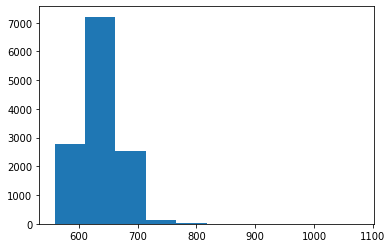

In [9]:
diff = compute_diff(model, X, y)
plt.hist(diff);

In [10]:
last_values_as_anomaly = [300, 500, 1000, 1500]
results = []
for value in last_values_as_anomaly:
    tresh = np.sort(diff)[-value-1]
    pred_anomaly_ids = find_anomaly(diff, tresh)
    res = len(set(pred_anomaly_ids) & set(anomaly_idxs)) / len(anomaly_idxs)
    results.append(res)

Text(0.5, 0, 'Amount of last samples regarded as Anomalies by model')

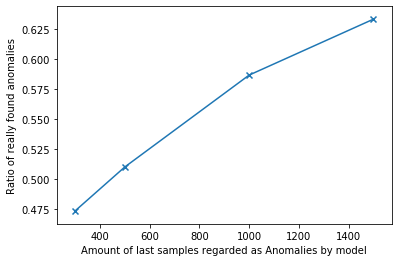

In [11]:
plt.plot(last_values_as_anomaly, results)
plt.scatter(last_values_as_anomaly, results, marker='x')
plt.ylabel('Ratio of really found anomalies')
plt.xlabel('Amount of last samples regarded as Anomalies by model')

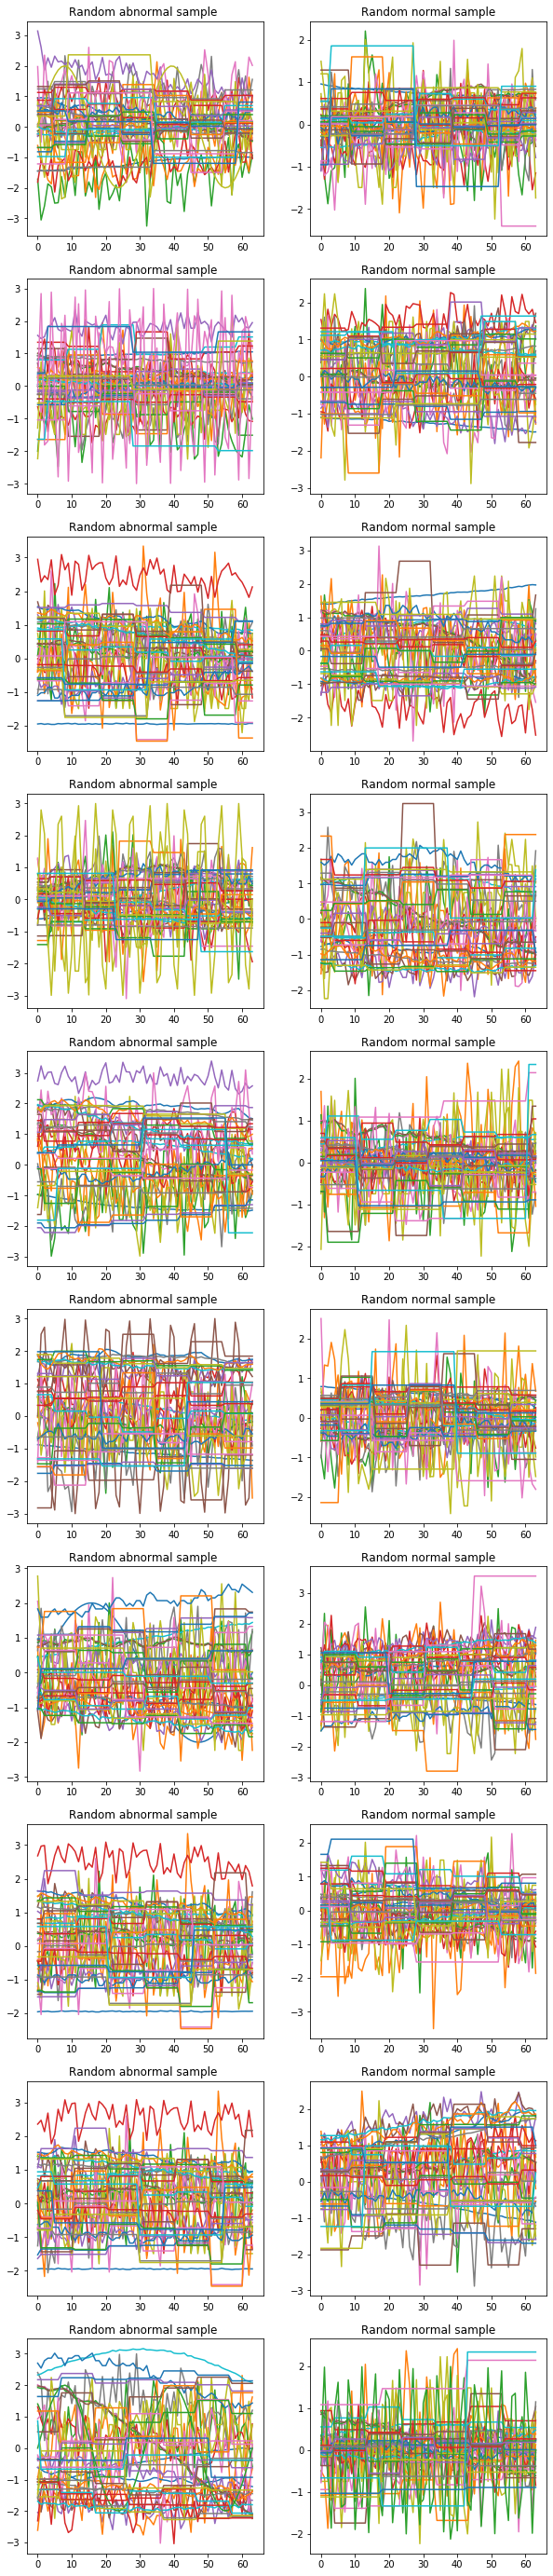

In [12]:
from src.visualization.visualize import plot_random
from src.utils import inverse_ids

anom_ids = find_anomaly(diff, np.sort(diff)[-301])
norm_ids = inverse_ids(anom_ids, X.shape[0])
plot_random(X[anom_ids], X[norm_ids])